In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
from skgarden import MondrianForestRegressor
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import cycle
from sklearn.metrics import mean_squared_error

import statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from pylab import rcParams

import pandas as pd

C:\Users\HakkyuKim\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\HakkyuKim\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
def score_for_res(pred, trueval) :
    u2 = (pred-trueval)**2
    v2 = (trueval-trueval.mean())**2
    
    return 1-(u2.sum()/v2.sum())

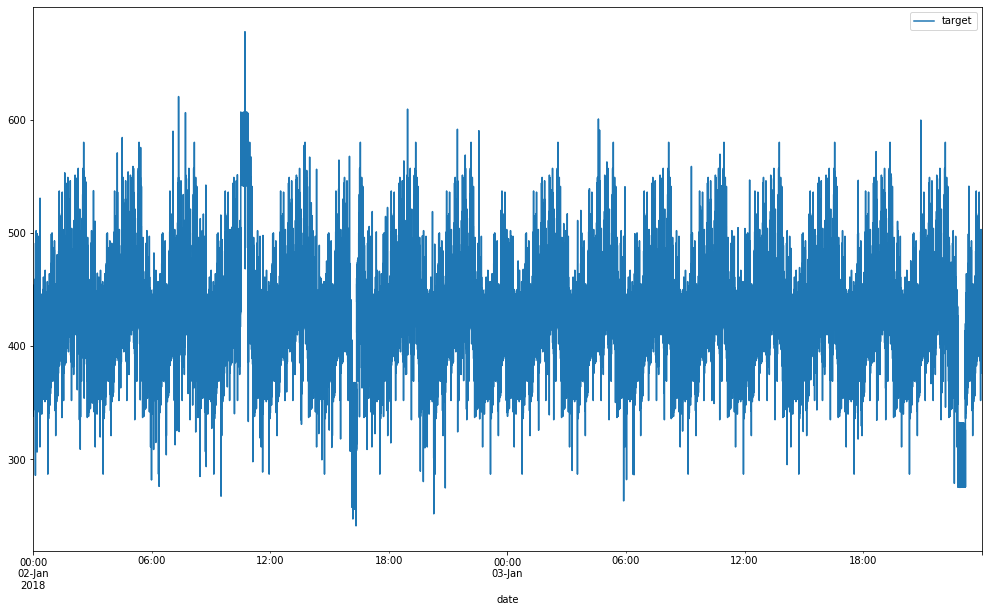

In [22]:
network = pd.read_csv('C:/Users/HakkyuKim/Desktop/yeonwoo/challenge/intial_trainig_stage.csv', index_col='date', parse_dates=['date'])
network.head()

network2 = pd.read_csv('C:/Users/HakkyuKim/Desktop/yeonwoo/challenge/intial_trainig_stage.csv')
network2.head()


rcParams['figure.figsize'] = 17,10
network.describe()
network.plot()

In [4]:
def partial_train(mtr, X_test, y_test, X_prev, y_prev):
    mtr.partial_fit(X_prev, y_prev)
    X_prev = X_test
    y_prev = y_test
    
    y_pred, y_std = mtr.predict(X_test, return_std=True)
    
    #print('pred : %f, std: %f, y: %f'%(y_pred, y_std, y_test))
    return y_pred, y_std

In [13]:
idx = network.index

tmp = network.shift(1)
tmp2 = network.shift(2)
tmp3 = network.shift(3)
tmp4 = network.shift(4)

network_prev = network.copy()
network_prev['prev1'] = tmp['target']
network_prev['prev2'] = tmp2['target']
network_prev['prev3'] = tmp3['target']

network_prev = network_prev[4:]
network_prev.head()

trainIdx = 100000
iterRange = 70001

In [15]:
X = network_prev[['prev1', 'prev2', 'prev3']]
y = network_prev['target']

X_train = X[:trainIdx]
y_train = y[:trainIdx]

X_test = X[trainIdx:trainIdx+1]
y_test = y[trainIdx:trainIdx+1]

print(X_test)


mtr = MondrianForestRegressor(random_state=1, n_estimators=100, bootstrap=True)
mtr.partial_fit(X_train, y_train)
y_pred, y_std = mtr.predict(X_test, return_std=True)
prediction3 = np.array([y_pred])
stdeviation3 = np.array([y_std])

                     prev1  prev2  prev3
date                                    
2018-01-03 03:46:44  406.0  440.0  425.0


In [16]:
for next in range(trainIdx+1, trainIdx+iterRange):
    X_prev = X_test
    y_prev = y_test
    X_test = X[next:next+1]
    y_test = y[next:next+1]

    y_pred, y_std = partial_train(mtr, X_test, y_test, X_prev, y_prev)
    prediction3 = np.append(prediction3, [y_pred])
    stdeviation3 = np.append(stdeviation3, [y_std])
    
    #print('iter : %d , pred : %f, std: %f, y: %f'%(next, y_pred, y_std, y_test))
    

2018-01-02 00:00:00
date
2018-01-02 00:00:04    361.0
Name: target, dtype: float64


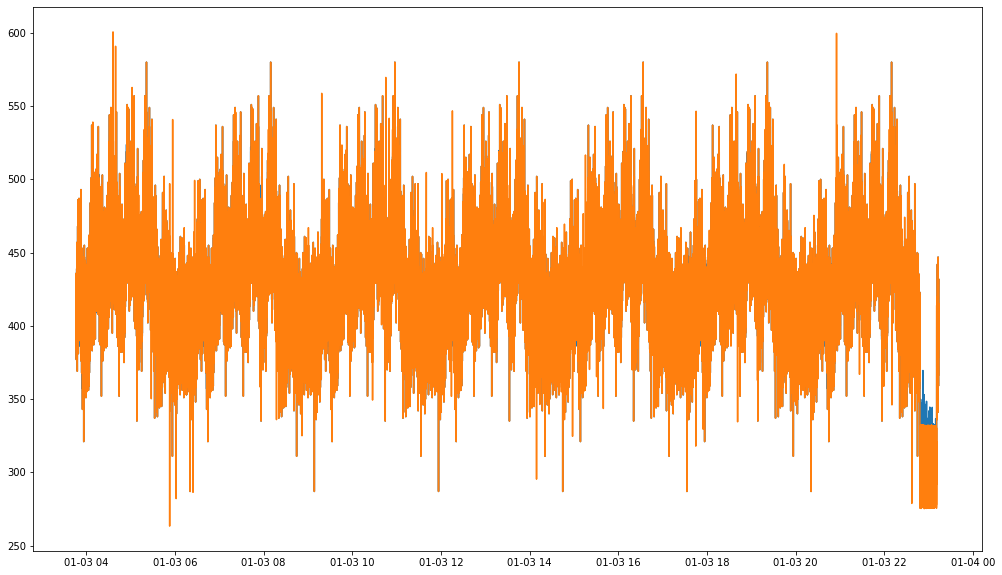

In [23]:
plt.plot(idx[trainIdx+4:trainIdx+iterRange+4], prediction3[:iterRange])
plt.plot(y[trainIdx:trainIdx+iterRange])

print(idx[0])
print(y[0:1])

In [18]:
score_for_res(prediction3, y[trainIdx:trainIdx+iterRange])


0.9840994253130914